# Construir sua primeira rede neural
<img src="files/produto_interno.png" width="200" height="100">
A primeira etapa é definir o vetor de entrada

In [5]:
input_vector = [1.72, 1.23]

A segunda consiste em escolher os pesos

In [6]:
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

Calcular o produto interno do vetor de entrada pelo pesos 1

In [7]:
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

In [8]:
print(f"O produto da primeira entrada pelo peseo é: {first_indexes_mult}")

O produto da primeira entrada pelo peseo é: 2.1672


In [9]:
print(f"O produto da primeira entrada pelo peseo é: {second_indexes_mult}")

O produto da primeira entrada pelo peseo é: 0.0


In [10]:
print(f"O produto interno é: {dot_product_1}")

O produto interno é: 2.1672


### Repetir as operações usando numpy
Importar a biblioteca numpy

In [11]:
import numpy as np

Calcular o produto interno do vetor de entrada pelo pesos 1 usando numpy

In [12]:
dot_product_1 = np.dot(input_vector, weights_1)

In [13]:
print(f"O produto interno é: {dot_product_1}")

O produto interno é: 2.1672


Calcular o produto interno do vetor de entrada pelo pesos 2 usando numpy


In [14]:
dot_product_2 = np.dot(input_vector, weights_2)

In [15]:
print(f"O produto interno é: {dot_product_2}")

O produto interno é: 4.1259999999999994


# Um problema de classificação

| Vetor de Entrada | Alvo |
| :- | -: |
| [1.66, 1.56] | 1 |
|   [2, 1.5]   | 0 |

#### Envolvendo os vetores em matrizes NumPy

In [16]:
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

#### Definição da função sigmoide

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

<function matplotlib.pyplot.show(close=None, block=None)>

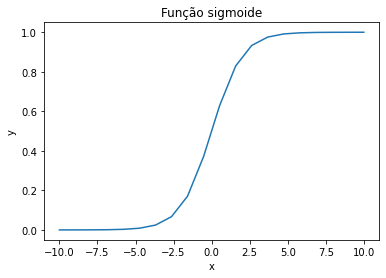

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-10,10,20)
y = sigmoid(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função sigmoide')
plt.show

#### Definição da função de predição

In [19]:
def make_prediction(input_vector, weights, bias):
     layer_1 = np.dot(input_vector, weights) + bias
     print(f"O resultado da saida da camada 1 é: {layer_1}")
     layer_2 = sigmoid(layer_1)
     return layer_2

In [20]:
prediction = make_prediction(input_vector, weights_1, bias)
print(f"O resultado da predição é: {prediction}")

O resultado da saida da camada 1 é: [1.3774]
O resultado da predição é: [0.7985731]


Modificando o vetor de entrada

In [21]:
input_vector = np.array([2, 1.5])

In [22]:
prediction = make_prediction(input_vector, weights_1, bias)
print(f"O resultado da predição é: {prediction}")

O resultado da saida da camada 1 é: [1.91]
O resultado da predição é: [0.87101915]


| Vetor de Entrada | Alvo | Predito |
| :- | -: | -: |
| [1.66, 1.56] | 1 | 0.798 |
|   [2, 1.5]   | 0 | 0.871 |

Treinar sua primeira rede neural:

In [23]:
target = 0
mse = np.square(prediction - target)
print(f"Predição: {prediction}; Erro: {mse}")

Predição: [0.87101915]; Erro: [0.75867436]


Calcular da derivada:

In [24]:
derivative = 2 * (prediction - target)
print(f"A derivada é {derivative}")

A derivada é [1.7420383]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-10,10,20)
dy = sigmoid(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função sigmoide')
plt.show

Atualizar pesos:

In [25]:
print(f"O peso anterior é {weights_1}")
weights_1 = weights_1 - derivative
print(f"O peso atualizado é {weights_1}")

O peso anterior é [ 1.45 -0.66]
O peso atualizado é [-0.2920383 -2.4020383]


Fazendo uma nova predição:

In [26]:
prediction = make_prediction(input_vector, weights_1, bias)
error = (prediction - target) ** 2
print(f"Prediction: {prediction}; Error: {error}")

O resultado da saida da camada 1 é: [-4.18713403]
Prediction: [0.01496248]; Error: [0.00022388]


| Vetor de Entrada | Alvo | Predito |
| :- | -: | -: |
| [1.66, 1.56] | 1 | 0.798 |
|   [2, 1.5]   | 0 | 0.015 |

### Ajustando os parâmetros com retropropagação

Construindo a derivada da função sigmoide

In [27]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

<function matplotlib.pyplot.show(close=None, block=None)>

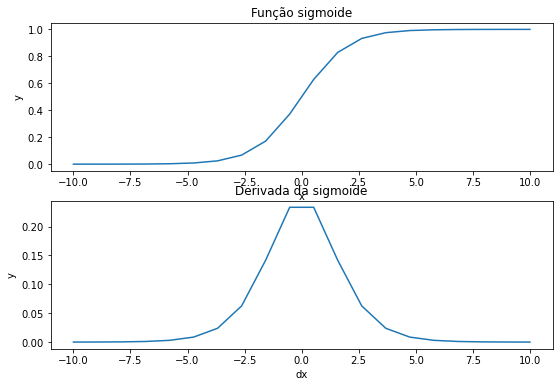

In [78]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
x=np.linspace(-10,10,20)
y = sigmoid(x)
plt.subplot(2,1,1)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função sigmoide')
plt.subplot(2,1,2)
dy= sigmoid_deriv(x)
plt.plot(x,dy)
plt.xlabel('dx')
plt.ylabel('y')
plt.title('Derivada da sigmoide')
plt.show

Calculando a derivada do erro de predição

In [28]:
print(f"O valor predito: {prediction}")
print(f"O valor do alvo é: {target}")
derror_dprediction = 2 * (prediction - target)
print(f"A derivada do erro de predição é: {derror_dprediction}")

O valor predito: [0.01496248]
O valor do alvo é: 0
A derivada do erro de predição é: [0.02992496]


Calculando o erro na saida da camada 1

In [29]:
print(f"O vetor de entrada: {input_vector}")
print(f"O vetor de pesos na primeira camada: {weights_1}")
print(f"O valor da polarização na primeira camada: {bias}")
layer_1 = np.dot(input_vector, weights_1) + bias
print(f"O valor de saida na primeira camada antes da função de ativação: {layer_1}")
print(f"O valor de saida na primeira camada apos a função de ativação: {sigmoid_deriv(layer_1)}")
dprediction_dlayer1 = sigmoid_deriv(layer_1)
print(f"A derivada do erro na saida da primeira camada é: {derror_dprediction}")

O vetor de entrada: [2.  1.5]
O vetor de pesos na primeira camada: [-0.2920383 -2.4020383]
O valor da polarização na primeira camada: [0.]
O valor de saida na primeira camada antes da função de ativação: [-4.18713403]
O valor de saida na primeira camada apos a função de ativação: [0.0147386]
A derivada do erro na saida da primeira camada é: [0.02992496]


Criando uma classe de rede neural

In [30]:
weights = np.array([np.random.randn(), np.random.randn()])
print(f"O vetor de peso: {weights}")
bias = np.random.randn()
print(f"O valor da polarização: {bias}")

O vetor de peso: [0.14939787 1.2704645 ]
O valor da polarização: 1.4508571630989318


In [110]:
def parametros(learning_rate):
        weights = np.array([np.random.randn(), np.random.randn()])
        bias = np.random.randn()
        learning_rate = learning_rate
learning_rate = 0.001
inicial = parametros(0.001)

In [111]:
print(f"O vetor de peso é: {weights}")
print(f"O valor da polarização é: {bias}")
print(f"A taxa de aprendizagem é: {learning_rate}")

O vetor de peso é: [0.37710793 0.753833  ]
O valor da polarização é: 0.03539325672125101
A taxa de aprendizagem é: 0.001


In [116]:
def parametros(learning_rate):
        weights = np.array([np.random.randn(), np.random.randn()])
        bias = np.random.randn()
        learning_rate = learning_rate
def _sigmoid( x):
        return 1 / (1 + np.exp(-x))
learning_rate = 0.001
sig = inicial._sigmoid(2)
print(f"O valor da sigmoide de 2 é: {sig}")

O valor da sigmoide de 2 é: 0.8807970779778823


In [117]:
def parametros(learning_rate):
        weights = np.array([np.random.randn(), np.random.randn()])
        bias = np.random.randn()
        learning_rate = learning_rate
def _sigmoid(x):
        return 1 / (1 + np.exp(-x))
def _sigmoid_deriv( x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

learning_rate = 0.001
der_sig = inicial._sigmoid_deriv(0.88)
print(f"O valor da derivada da sigmoide de 0.88 é: {der_sig}")

O valor da derivada da sigmoide de 0.88 é: 0.20722456886192342


In [119]:
def parametros(learning_rate):
        weights = np.array([np.random.randn(), np.random.randn()])
        bias = np.random.randn()
        learning_rate = learning_rate

def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

def _sigmoid_deriv(x):
        return self._sigmoid(x) * (1 - _sigmoid(x))

def predict(input_vector):
        layer_1 = np.dot(input_vector, weights) + bias
        layer_2 = sigmoid(layer_1)        
        prediction = layer_2
        return prediction, layer_1, layer_2
input_vector = [1.72, 1.23]
pred = predict(input_vector)
print(f"Para a entrada: {input_vector}")
print(f"O valor predito é: {pred[0]}")
print(f"O valor dos pesos da camada de entrada é: {weights}")
print(f"O valor da polaridade da camada de entrada é: {bias}")
print(f"O resultado da camada de entrada é: {pred[1]}")
print(f"O resultado da camada de saida é: {pred[2]}")

Para a entrada: [1.72, 1.23]
O valor predito é: 0.8335825697799651
O valor dos pesos da camada de entrada é: [0.37710793 0.753833  ]
O valor da polaridade da camada de entrada é: 0.03539325672125101
O resultado da camada de entrada é: 1.6112334893877136
O resultado da camada de saida é: 0.8335825697799651


In [124]:
def parametros(learning_rate):
        weights = np.array([np.random.randn(), np.random.randn()])
        bias = np.random.randn()
        learning_rate = learning_rate

def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

def _sigmoid_deriv(x):
        return self._sigmoid(x) * (1 - _sigmoid(x))

def predict(input_vector):
        layer_1 = np.dot(input_vector, weights) + bias
        layer_2 = sigmoid(layer_1)        
        prediction = layer_2
        return prediction, layer_1, layer_2
def _compute_gradients(input_vector, target):
        layer_1 = np.dot(input_vector, weights) + bias
        layer_2 = _sigmoid(layer_1)
        prediction = layer_2
        
        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = _sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * weights) + (1 * input_vector)
        return derror_dprediction, dprediction_dlayer1, dlayer1_dbias, dlayer1_dweights                                 
        
input_vector = [1.72, 1.23]
pred = inicial.predict(input_vector)
print(f"Para a entrada: {input_vector}")
print(f"O valor dos pesos da camada de entrada é: {weights}")
print(f"O valor da polaridade da camada de entrada é: {bias}")
print(f"O resultado da camada de entrada é: {pred[1]}")
print(f"O resultado da camada de saida é: {pred[2]}")
print(f"O valor predito é: {pred[0]}")

target = 1 
print(f"O valor de alvo é: {target}")
gradiente = inicial._compute_gradients(input_vector,target)                                               
print(f"A derivada do erro de predição é: {gradiente[0]}")
print(f"A derivada do erro de predição na camada de entrada é: {gradiente[1]}")
print(f"A derivada da polarização é: {gradiente[2]}")
print(f"A derivada dos pesos são: {gradiente[3]}")

Para a entrada: [1.72, 1.23]
O valor dos pesos da camada de entrada é: [0.37710793 0.753833  ]
O valor da polaridade da camada de entrada é: 0.03539325672125101
O resultado da camada de entrada é: -1.6070842474967688
O resultado da camada de saida é: 0.1669938210942353
O valor predito é: 0.1669938210942353
O valor de alvo é: 1
A derivada do erro de predição é: -1.6660123578115293
A derivada do erro de predição na camada de entrada é: 0.13910688481058184
A derivada da polarização é: 1
A derivada dos pesos são: [1.72 1.23]


In [121]:
def parametros(learning_rate):
        weights = np.array([np.random.randn(), np.random.randn()])
        bias = np.random.randn()
        learning_rate = learning_rate

def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

def _sigmoid_deriv(x):
        return self._sigmoid(x) * (1 - _sigmoid(x))

def predict(input_vector):
        layer_1 = np.dot(input_vector, weights) + bias
        layer_2 = sigmoid(layer_1)        
        prediction = layer_2
        return prediction, layer_1, layer_2
def _compute_gradients(input_vector, target):
        layer_1 = np.dot(input_vector, weights) + bias
        layer_2 = _sigmoid(layer_1)
        prediction = layer_2
        
        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = _sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * weights) + (1 * input_vector)
                
        return derror_dprediction, dprediction_dlayer1, dlayer1_dbias, dlayer1_dweights, derror_dbias, derror_dweights
        
input_vector = [1.72, 1.23]
pred = inicial.predict(input_vector)
print(f"Para a entrada: {input_vector}")
print(f"O valor dos pesos da camada de entrada é: {weights}")
print(f"O valor da polaridade da camada de entrada é: {bias}")
print(f"O resultado da camada de entrada é: {pred[1]}")
print(f"O resultado da camada de saida é: {pred[2]}")
print(f"O valor predito é: {pred[0]}")

target = 1 
print(f"O valor de alvo é: {target}")
gradiente = []
gradiente = inicial._compute_gradients(input_vector,target)                                               
print(f"A derivada do erro de predição é: {gradiente[0]}")
print(f"A derivada do erro de predição na camada de entrada é: {gradiente[1]}")
print(f"A derivada da polarização é: {gradiente[2]}")
print(f"A derivada dos pesos são: {gradiente[3]}")
print(f"A derivada do erro em relação a polarização é: {gradiente[4]}")
print(f"A derivada do erro em relação aos pesos são: {gradiente[5]}")

Para a entrada: [1.72, 1.23]
O valor dos pesos da camada de entrada é: [0.37710793 0.753833  ]
O valor da polaridade da camada de entrada é: 0.03539325672125101
O resultado da camada de entrada é: -1.6081199525542806
O resultado da camada de saida é: 0.16684979707631079
O valor predito é: 0.16684979707631079
O valor de alvo é: 1
A derivada do erro de predição é: -1.6663004058473785
A derivada do erro de predição na camada de entrada é: 0.1390109422919047
A derivada da polarização é: 1
A derivada dos pesos são: [1.72 1.23]
A derivada do erro em relação a polarização é: -0.2316339895582273
A derivada do erro em relação aos pesos são: [-0.39841046 -0.28490981]


In [138]:
def parametros(learning_rate):
        weights = np.array([np.random.randn(), np.random.randn()])
        bias = np.random.randn()
        learning_rate = learning_rate

def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

def _sigmoid_deriv(x):
        return _sigmoid(x) * (1 - _sigmoid(x))

def predict(input_vector,weights,bias):
        layer_1 = np.dot(input_vector, weights) + bias
        layer_2 = sigmoid(layer_1)        
        prediction = layer_2
        return prediction, layer_1, layer_2
def _compute_gradients( input_vector, target,weights,bias):
        layer_1 = np.dot(input_vector, weights) + bias
        layer_2 = _sigmoid(layer_1)
        prediction = layer_2
        
        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = _sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * weights) + (1 * input_vector)
                
        return derror_dprediction, dprediction_dlayer1, dlayer1_dbias, dlayer1_dweights, derror_dbias, derror_dweights
    
def _update_parameters(derror_dbias, derror_dweights,bias,weights,learning_rate):
        bias = bias - (derror_dbias * learning_rate)        
        weights = weights - (derror_dweights * learning_rate)
        print(bias,weights)
        return bias, weights
        
input_vector = [1.72, 1.23]

pred = predict(input_vector,weights,bias)
print(f"Para a entrada: {input_vector}")
print(f"O valor dos pesos da camada de entrada é: {weights}")
print(f"O valor da polaridade da camada de entrada é: {bias}")
print(f"O resultado da camada de entrada é: {pred[1]}")
print(f"O resultado da camada de saida é: {pred[2]}")
print(f"O valor predito é: {pred[0]}")

target = 1 
print(f"O valor de alvo é: {target}")

gradiente = _compute_gradients(input_vector,target,weights,bias)                                               
print(f"A derivada do erro de predição é: {gradiente[0]}")
print(f"A derivada do erro de predição na camada de entrada é: {gradiente[1]}")
print(f"A derivada da polarização é: {gradiente[2]}")
print(f"A derivada dos pesos são: {gradiente[3]}")
print(f"A derivada do erro em relação a polarização é: {gradiente[4]}")
print(f"A derivada do erro em relação aos pesos são: {gradiente[5]}")

derror_dbias= gradiente[4]
derror_dweights = gradiente[5]
atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights,learning_rate)
bias = atualiza[0]
weights = atualiza[1]
print(f"O valor dos pesos da camada de entrada é: {atualiza[1]}")
print(f"O valor da polaridade da camada de entrada é: {atualiza[0]}")

print('---------------------------')
print('Calculo da segunda iteração')

pred = inicial.predict(input_vector)
print(f"Para a entrada: {input_vector}")
print(f"O valor dos pesos da camada de entrada é: {weights}")
print(f"O valor da polaridade da camada de entrada é: {bias}")
print(f"O resultado da camada de entrada é: {pred[1]}")
print(f"O resultado da camada de saida é: {pred[2]}")
print(f"O valor predito é: {pred[0]}")

Para a entrada: [1.72, 1.23]
O valor dos pesos da camada de entrada é: [0.37870487 0.754975  ]
O valor da polaridade da camada de entrada é: 0.03632170995097921
O resultado da camada de entrada é: 1.6163133355435255
O resultado da camada de saida é: 0.8342860659765473
O valor predito é: 0.8342860659765473
O valor de alvo é: 1
A derivada do erro de predição é: -0.3314278680469054
A derivada do erro de predição na camada de entrada é: 0.13825282609392345
A derivada da polarização é: 1
A derivada dos pesos são: [1.72 1.23]
A derivada do erro em relação a polarização é: -0.23211330743205083
A derivada do erro em relação aos pesos são: [-0.39923489 -0.28549937]
0.036553823258411264 [0.37910411 0.7552605 ]
O valor dos pesos da camada de entrada é: [0.37910411 0.7552605 ]
O valor da polaridade da camada de entrada é: 0.036553823258411264
---------------------------
Calculo da segunda iteração
Para a entrada: [1.72, 1.23]
O valor dos pesos da camada de entrada é: [0.37910411 0.7552605 ]
O valo

In [140]:
input_vector = [1.72, 1.23]

pred = predict(input_vector,weights,bias)
print(f"Para a entrada: {input_vector}")
print(f"O valor dos pesos da camada de entrada é: {weights}")
print(f"O valor da polaridade da camada de entrada é: {bias}")
print(f"O resultado da camada de entrada é: {pred[1]}")
print(f"O resultado da camada de saida é: {pred[2]}")
print(f"O valor predito é: {pred[0]}")

target = 1 
print(f"O valor de alvo é: {target}")

gradiente = _compute_gradients(input_vector,target,weights,bias)                                               
print(f"A derivada do erro de predição é: {gradiente[0]}")
print(f"A derivada do erro de predição na camada de entrada é: {gradiente[1]}")
print(f"A derivada da polarização é: {gradiente[2]}")
print(f"A derivada dos pesos são: {gradiente[3]}")
print(f"A derivada do erro em relação a polarização é: {gradiente[4]}")
print(f"A derivada do erro em relação aos pesos são: {gradiente[5]}")

derror_dbias= gradiente[4]
derror_dweights = gradiente[5]
atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights,learning_rate)
bias = atualiza[0]
weights = atualiza[1]
print(f"O valor dos pesos da camada de entrada é: {atualiza[1]}")
print(f"O valor da polaridade da camada de entrada é: {atualiza[0]}")

print('---------------------------')
print('Calculo da segunda iteração')

pred = inicial.predict(input_vector)
print(f"Para a entrada: {input_vector}")
print(f"O valor dos pesos da camada de entrada é: {weights}")
print(f"O valor da polaridade da camada de entrada é: {bias}")
print(f"O resultado da camada de entrada é: {pred[1]}")
print(f"O resultado da camada de saida é: {pred[2]}")
print(f"O valor predito é: {pred[0]}")

target = 1 
print(f"O valor de alvo é: {target}")

gradiente = _compute_gradients(input_vector,target,weights,bias)                                               
print(f"A derivada do erro de predição é: {gradiente[0]}")
print(f"A derivada do erro de predição na camada de entrada é: {gradiente[1]}")
print(f"A derivada da polarização é: {gradiente[2]}")
print(f"A derivada dos pesos são: {gradiente[3]}")
print(f"A derivada do erro em relação a polarização é: {gradiente[4]}")
print(f"A derivada do erro em relação aos pesos são: {gradiente[5]}")

derror_dbias= gradiente[4]
derror_dweights = gradiente[5]
atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights,learning_rate)
bias = atualiza[0]
weights = atualiza[1]
print(f"O valor dos pesos da camada de entrada é: {atualiza[1]}")
print(f"O valor da polaridade da camada de entrada é: {atualiza[0]}")

print('---------------------------')
print('Calculo da terceira iteração')

pred = inicial.predict(input_vector)
print(f"Para a entrada: {input_vector}")
print(f"O valor dos pesos da camada de entrada é: {weights}")
print(f"O valor da polaridade da camada de entrada é: {bias}")
print(f"O resultado da camada de entrada é: {pred[1]}")
print(f"O resultado da camada de saida é: {pred[2]}")
print(f"O valor predito é: {pred[0]}")

Para a entrada: [1.72, 1.23]
O valor dos pesos da camada de entrada é: [0.37990258 0.75583149]
O valor da polaridade da camada de entrada é: 0.037018049873275366
O resultado da camada de entrada é: 1.6201232201603841
O resultado da camada de saida é: 0.834812122674346
O valor predito é: 0.834812122674346
O valor de alvo é: 1
A derivada do erro de predição é: -0.330375754651308
A derivada do erro de predição na camada de entrada é: 0.1379008425102987
A derivada da polarização é: 1
A derivada dos pesos são: [1.72 1.23]
A derivada do erro em relação a polarização é: -0.23211330743205083
A derivada do erro em relação aos pesos são: [-0.39923489 -0.28549937]
0.03725016318070742 [0.38030181 0.75611699]
O valor dos pesos da camada de entrada é: [0.38030181 0.75611699]
O valor da polaridade da camada de entrada é: 0.03725016318070742
---------------------------
Calculo da segunda iteração
Para a entrada: [1.72, 1.23]
O valor dos pesos da camada de entrada é: [0.38030181 0.75611699]
O valor da 